<a href="https://colab.research.google.com/github/lifahjdm/Birds-Recognition/blob/main/Birds_Species_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
import pandas as pd
import numpy as np
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

In [27]:
# path to the dataset
dir ='/content/drive/MyDrive/Birds Species Recognizing/Voice of Birds'
birds_list = os.listdir(dir)

In [28]:
# Create DataFrame
df = pd.DataFrame()
df['chirps'] = birds_list

# Extract Labels (Birds Species) from filenames
df['labels'] = [re.sub(r'\d+\.mp3$', '', audio) for audio in birds_list]

df.head()

,chirps,labels
0,Cinereous Tinamou5.mp3,Cinereous Tinamou
1,Cinereous Tinamou6.mp3,Cinereous Tinamou
2,Cinereous Tinamou30.mp3,Cinereous Tinamou
3,Cinereous Tinamou7.mp3,Cinereous Tinamou
4,Cinereous Tinamou3.mp3,Cinereous Tinamou


In [29]:
df.groupby('labels')['labels'].count()

,labels
labels,
Andean Guan,30
Andean Tinamou,30
Band-tailed Guan,30
Bartletts Tinamou,30
Black-capped Tinamou,30
Blue-throated Piping Guan,30
Brazilian Tinamou,30
Brown Tinamou,30
Cauca Guan,30


In [30]:
num_labels = df['labels'].nunique()
print(f"Jumlah spesies: {num_labels}")

Jumlah spesies: 45


In [31]:
df['labels'].value_counts().sum()

1350

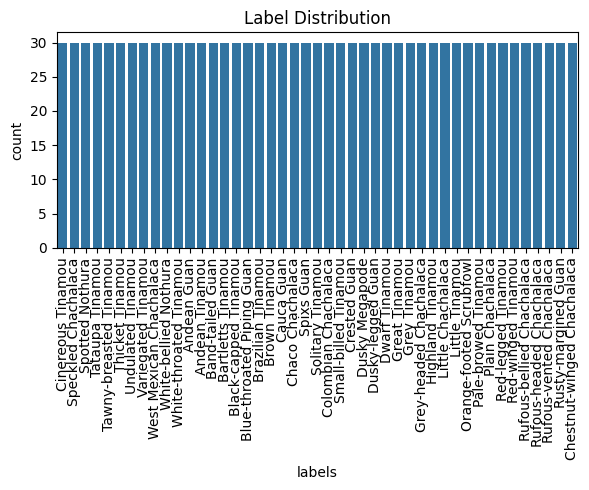

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original label distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index)
plt.title('Label Distribution')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
# Feature extraction function
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

In [34]:
# Extract features for all audio files
features = []
for file in df['chirps']:
    file_path = os.path.join(dir, file)
    mfcc = extract_mfcc(file_path)
    features.append(mfcc)

<ipython-input-33-e6789200ef68>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [35]:
# Convert features to a numpy array
X = np.array(features)
y = df['labels'].values

#Print the shape of X and y to see the data structure
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1350, 13)
Shape of y: (1350,)


In [38]:
# Encode the labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:
import pickle

# Simpan LabelEncoder ke file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [40]:
# Apply RandomOverSampler to balance the classes
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_encoded)

# Convert the resampled encoded labels back to the original labels
y_resampled_labels = label_encoder.inverse_transform(y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


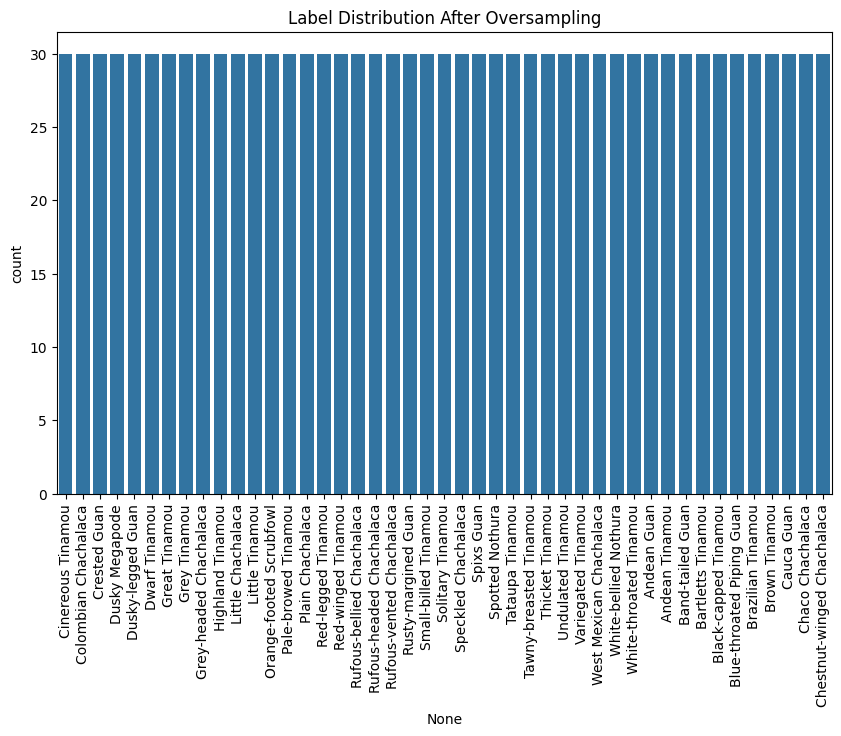

In [41]:
# Visualize the label distribution after oversampling
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.Series(y_resampled_labels))
plt.title('Label Distribution After Oversampling')
plt.xticks(rotation=90)
plt.show()

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_labels, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Visualize the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Print the shapes of y_train and y_test
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training data shape: (1080, 13, 1)
Testing data shape: (270, 13, 1)
y_train shape: (1080,)
y_test shape: (270,)


Data telah berhasil dipisahkan menjadi training set (80%) dan test set (20%) menggunakan train_test_split

In [43]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Ensure the labels are encoded as integers (this should already be done)
# Using the previously encoded labels
y_train_encoded = label_encoder.transform(y_train)  # Use LabelEncoder's transform method
y_test_encoded = label_encoder.transform(y_test)

# Now, one-hot encode the labels
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Build the CNN model
# Hyperparameter tuning & Model improvements
from tensorflow.keras.layers import BatchNormalization

# Build the CNN model
model = Sequential()

# First convolutional layer with normalization
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())  # Added batch normalization
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())  # Added batch normalization
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model with a lower learning rate for more stable convergence
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model with early stopping to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 45)                  │           5,805 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,045 (187.68 KB)

 Trainable params: 47,661 (186.18 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0482 - loss: 4.3323 - val_accuracy: 0.0481 - val_loss: 3.7100
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0957 - loss: 3.4991 - val_accuracy: 0.0815 - val_loss: 3.6100
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2085 - loss: 3.2286 - val_accuracy: 0.1074 - val_loss: 3.5240
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2287 - loss: 3.0374 - val_accuracy: 0.2111 - val_loss: 3.3092
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2594 - loss: 2.8984 - val_accuracy: 0.2296 - val_loss: 3.1588
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3153 - loss: 2.6884 - val_accuracy: 0.2889 - val_loss: 2.9795
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3228 - loss: 2.5977 - val_accuracy: 0.3074 - val_loss: 2.8586
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3781 - loss: 2.4205 - val_accuracy: 0.3481 - val_loss

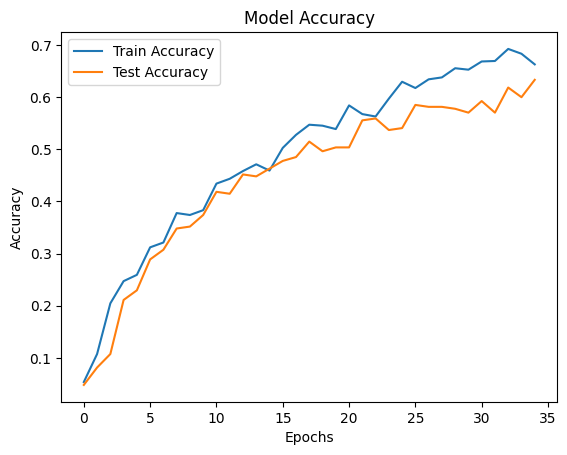

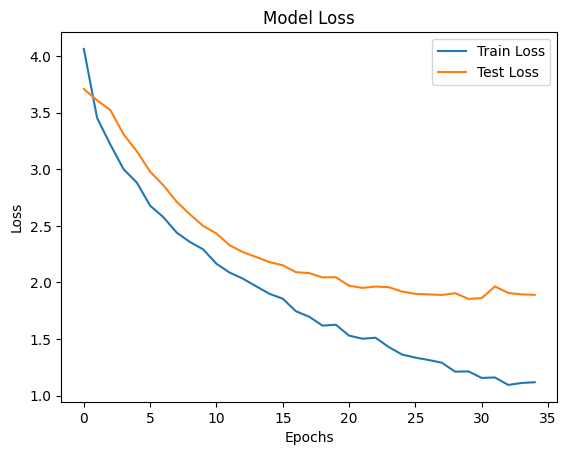

In [44]:
# Visualize the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 1.8580 
Test Loss: 1.8550430536270142
Test Accuracy: 0.5703703761100769


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Accuracy: 0.5703703703703704


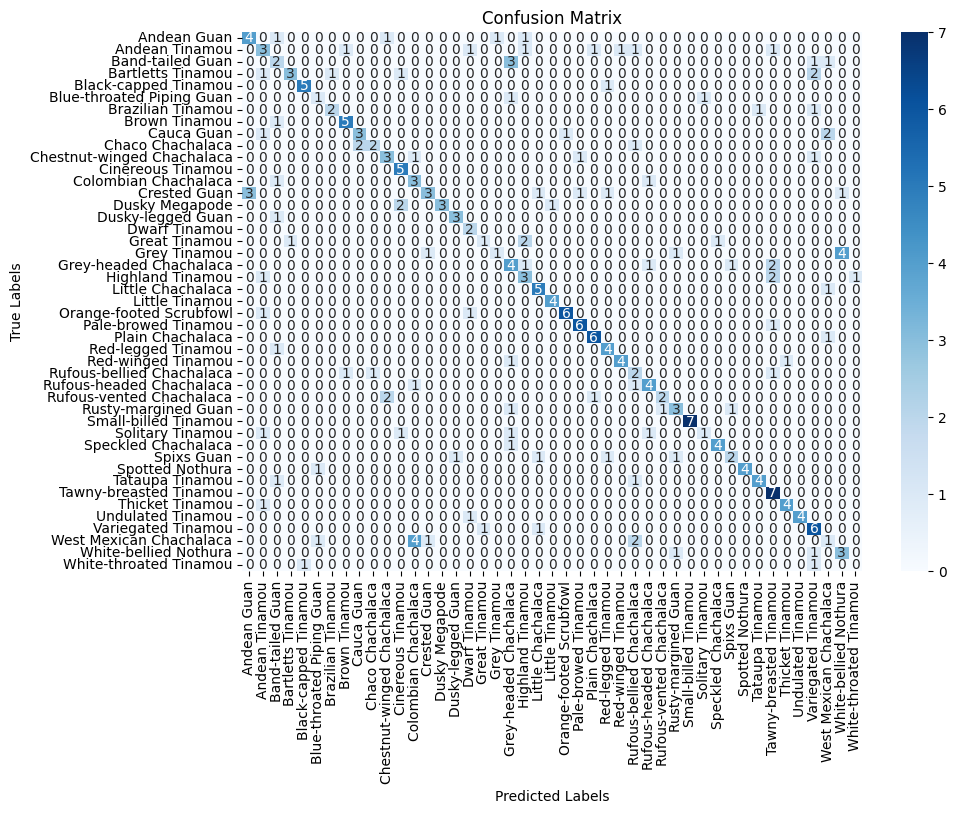

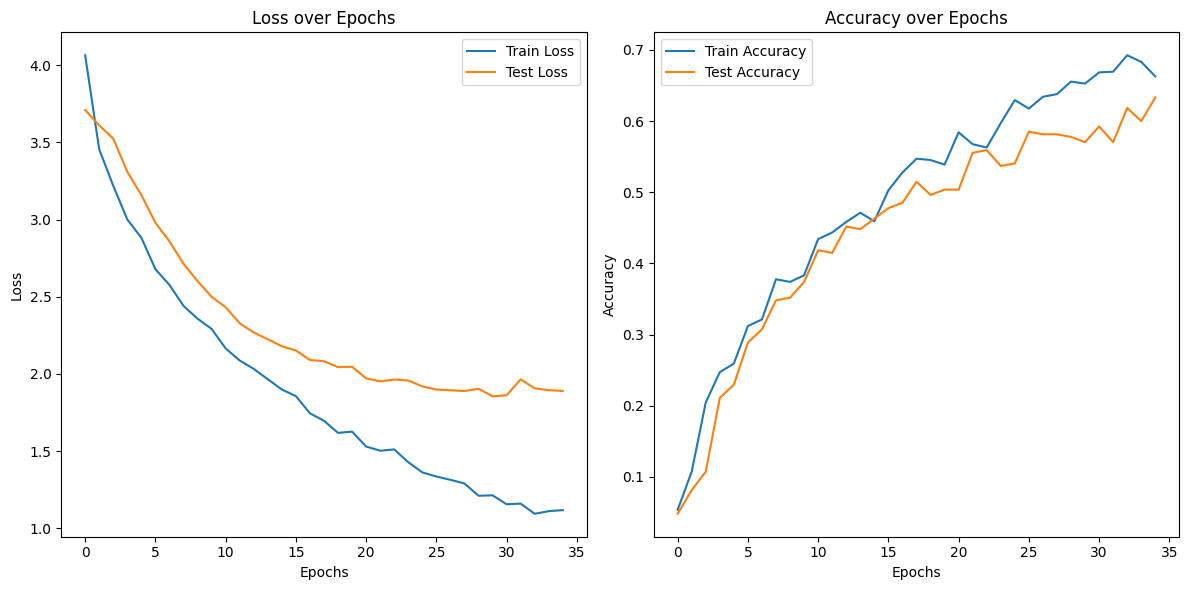

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class for the sample: Little Chachalaca


In [46]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan np.argmax untuk mendapatkan kelas dengan probabilitas tertinggi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Menggunakan label_encoder untuk mengonversi y_test kembali ke label integer jika diperlukan
# Misalnya y_test sudah ter-encode, maka kita bisa langsung menggunakan y_test
# Pastikan y_test adalah integer encoded labels, bukan one-hot
# Misalnya, jika y_test sudah berupa integer (hasil transformasi dengan LabelEncoder), kita bisa menggunakan langsung.

y_test_int = label_encoder.transform(y_test)  # Mengubah y_test menjadi integer encoded jika diperlukan

# Menghitung akurasi prediksi
accuracy_pred = accuracy_score(y_test_int, y_pred)
print(f"Predicted Accuracy: {accuracy_pred}")

# Confusion Matrix
cm = confusion_matrix(y_test_int, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot Training and Testing Loss & Accuracy
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Contoh prediksi untuk sample dari X_test
sample_index = 0  # Ambil indeks sample pertama
sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)  # Reshape untuk input model

# Prediksi label untuk sample
predicted_label = model.predict(sample)
predicted_class = label_encoder.inverse_transform([np.argmax(predicted_label)])

print(f"Predicted class for the sample: {predicted_class[0]}")



In [47]:
model.save('cnn.h5')

In [48]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Fungsi untuk mengekstrak MFCC dari file audio
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)  # Rata-rata untuk setiap koefisien MFCC
    return mfcc_mean

# Path ke file audio yang ingin diprediksi
example_file = '/content/drive/MyDrive/Birds Species Recognizing/Voice of Birds/White-throated Tinamou31.mp3'

# Ekstraksi fitur MFCC dari file audio
mfcc_features = extract_mfcc(example_file)

# Reshape untuk menyesuaikan dengan input model (1, n_features, 1)
mfcc_features_reshaped = mfcc_features.reshape(1, mfcc_features.shape[0], 1)

# Memuat model yang sudah dilatih (misalnya model yang telah disimpan sebelumnya)
# Jika model sudah dilatih sebelumnya, muat model dengan cara ini:
model = load_model('cnn.h5')  # Gantilah dengan path model Anda jika sudah disimpan

# Lakukan prediksi
predicted_prob = model.predict(mfcc_features_reshaped)
predicted_class = np.argmax(predicted_prob, axis=1)

# Mengonversi hasil prediksi kembali ke label asli menggunakan LabelEncoder
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f"Predicted label for the audio file: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted label for the audio file: White-throated Tinamou


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Hyperparameter tuning & Model improvements
model = Sequential()

# First convolutional layer with normalization
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())  # Added batch normalization
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())  # Added batch normalization
model.add(MaxPooling1D(pool_size=2))

# Global Average Pooling layer to reduce overfitting and make the model more robust
model.add(GlobalAveragePooling1D())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Optimizer with adjusted learning rate (lower rate for stability)
optimizer = Adam(learning_rate=0.0005)  # Adjusted learning rate

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Learning rate scheduler to reduce learning rate as training progresses
def lr_schedule(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.7  # Reduce learning rate by 30% every 10 epochs
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and learning rate scheduler
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping, lr_scheduler])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 11, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 45)                  │           5,805 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,045 (187.68 KB)

 Trainable params: 47,661 (186.18 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0302 - loss: 4.7543 - val_accuracy: 0.0481 - val_loss: 3.9840 - learning_rate: 5.0000e-04
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0795 - loss: 3.7096 - val_accuracy: 0.0778 - val_loss: 3.6822 - learning_rate: 5.0000e-04
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1402 - loss: 3.3932 - val_accuracy: 0.1407 - val_loss: 3.5460 - learning_rate: 5.0000e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1630 - loss: 3.2563 - val_accuracy: 0.2111 - val_loss: 3.4171 - learning_rate: 5.0000e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2182 - loss: 3.0819 - val_accuracy: 0.2741 - val_loss: 3.3022 - learning_rate: 5.0000e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2764 - loss: 2.9143 - val_accuracy: 0.2741 - val_loss: 3.1553 - learning_rate: 5.0000e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2785

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5857 - loss: 1.8195 
Test Loss: 1.83928644657135
Test Accuracy: 0.5777778029441833


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Accuracy: 0.5777777777777777


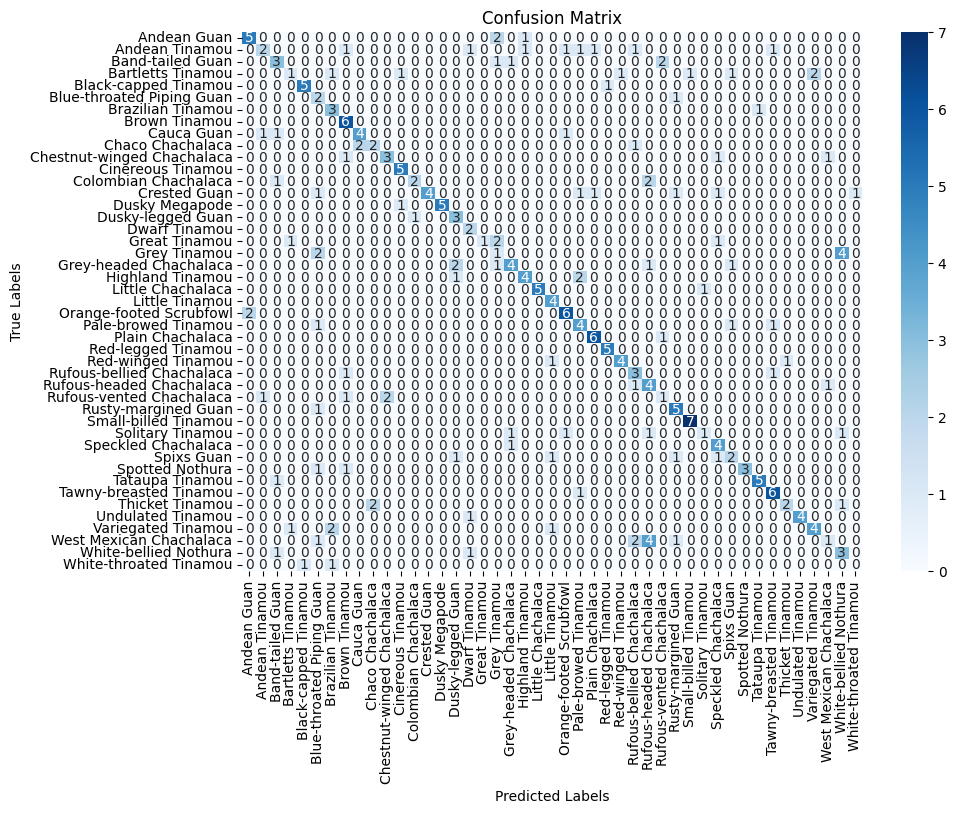

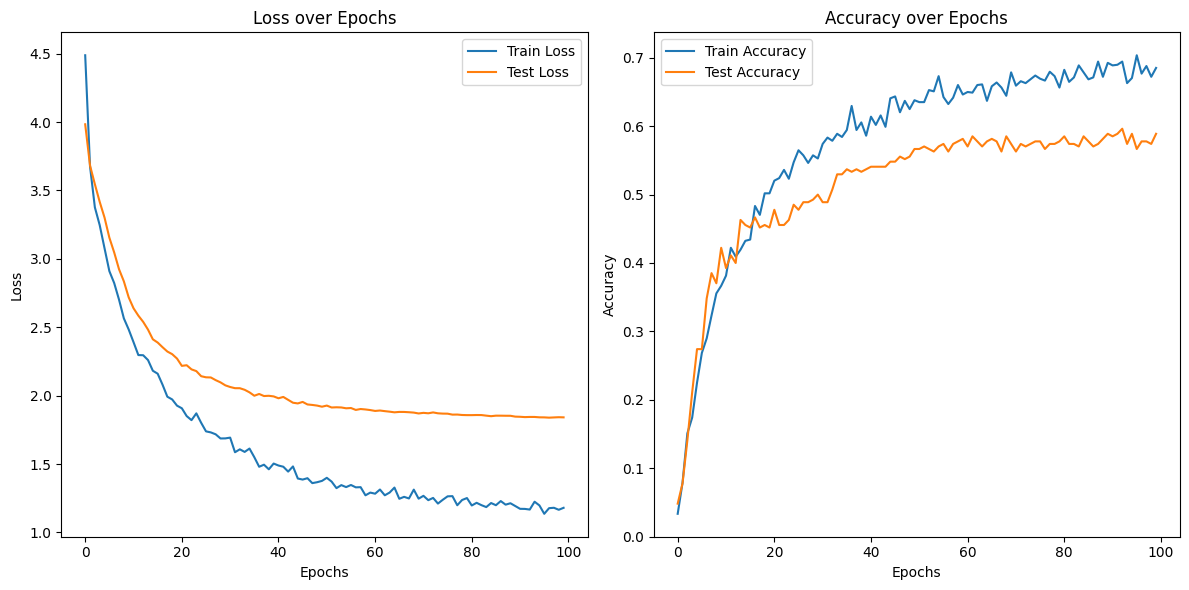

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class for the sample: Little Chachalaca


In [51]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan np.argmax untuk mendapatkan kelas dengan probabilitas tertinggi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Menggunakan label_encoder untuk mengonversi y_test kembali ke label integer jika diperlukan
# Misalnya y_test sudah ter-encode, maka kita bisa langsung menggunakan y_test
# Pastikan y_test adalah integer encoded labels, bukan one-hot
# Misalnya, jika y_test sudah berupa integer (hasil transformasi dengan LabelEncoder), kita bisa menggunakan langsung.

y_test_int = label_encoder.transform(y_test)  # Mengubah y_test menjadi integer encoded jika diperlukan

# Menghitung akurasi prediksi
accuracy_pred = accuracy_score(y_test_int, y_pred)
print(f"Predicted Accuracy: {accuracy_pred}")

# Confusion Matrix
cm = confusion_matrix(y_test_int, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot Training and Testing Loss & Accuracy
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Contoh prediksi untuk sample dari X_test
sample_index = 0  # Ambil indeks sample pertama
sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)  # Reshape untuk input model

# Prediksi label untuk sample
predicted_label = model.predict(sample)
predicted_class = label_encoder.inverse_transform([np.argmax(predicted_label)])

print(f"Predicted class for the sample: {predicted_class[0]}")

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get predicted labels (integers) from model output
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Convert one-hot encoded y_true to integer labels
y_true_labels = np.argmax(y_test_encoded, axis=1)

# Now, calculate metrics using the integer labels
accuracy = accuracy_score(y_true_labels, y_pred_labels)

precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.5777777777777777
Precision: 0.6109630698519587
Recall: 0.5777777777777777
F1 Score: 0.5629034823806066

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.50      0.20      0.29        10
           2       0.43      0.43      0.43         7
           3       0.33      0.12      0.18         8
           4       0.83      0.83      0.83         6
           5       0.22      0.67      0.33         3
           6       0.43      0.75      0.55         4
           7       0.55      1.00      0.71         6
           8       0.67      0.57      0.62         7
           9       0.50      0.40      0.44         5
          10       0.60      0.50      0.55         6
          11       0.71      1.00      0.83         5
          12       0.67      0.40      0.50         5
          13       1.00      0.40      0.57        10
          14

In [53]:
df.groupby('labels')['labels'].count()

,labels
labels,
Andean Guan,30
Andean Tinamou,30
Band-tailed Guan,30
Bartletts Tinamou,30
Black-capped Tinamou,30
Blue-throated Piping Guan,30
Brazilian Tinamou,30
Brown Tinamou,30
Cauca Guan,30


In [54]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Fungsi untuk mengekstrak MFCC dari file audio
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)  # Rata-rata untuk setiap koefisien MFCC
    return mfcc_mean

# Path ke file audio yang ingin diprediksi
example_file = '/content/drive/MyDrive/Birds Species Recognizing/Voice of Birds/Undulated Tinamou7.mp3'

# Ekstraksi fitur MFCC dari file audio
mfcc_features = extract_mfcc(example_file)

# Reshape untuk menyesuaikan dengan input model (1, n_features, 1)
mfcc_features_reshaped = mfcc_features.reshape(1, mfcc_features.shape[0], 1)

# Memuat model yang sudah dilatih (misalnya model yang telah disimpan sebelumnya)
# Jika model sudah dilatih sebelumnya, muat model dengan cara ini:
model = load_model('cnn.h5')  # Gantilah dengan path model Anda jika sudah disimpan

# Lakukan prediksi
predicted_prob = model.predict(mfcc_features_reshaped)
predicted_class = np.argmax(predicted_prob, axis=1)

# Mengonversi hasil prediksi kembali ke label asli menggunakan LabelEncoder
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f"Predicted label for the audio file: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted label for the audio file: Undulated Tinamou


In [55]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Fungsi untuk mengekstrak MFCC dari file audio
def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)  # Rata-rata untuk setiap koefisien MFCC
    return mfcc_mean

# Path ke file audio yang ingin diprediksi
example_file = '/content/drive/MyDrive/Birds Species Recognizing/Voice of Birds/Tawny-breasted Tinamou15.mp3'

# Ekstraksi fitur MFCC dari file audio
mfcc_features = extract_mfcc(example_file)

# Reshape untuk menyesuaikan dengan input model (1, n_features, 1)
mfcc_features_reshaped = mfcc_features.reshape(1, mfcc_features.shape[0], 1)

# Memuat model yang sudah dilatih (misalnya model yang telah disimpan sebelumnya)
# Jika model sudah dilatih sebelumnya, muat model dengan cara ini:
model = load_model('cnn.h5')  # Gantilah dengan path model Anda jika sudah disimpan

# Lakukan prediksi
predicted_prob = model.predict(mfcc_features_reshaped)
predicted_class = np.argmax(predicted_prob, axis=1)

# Mengonversi hasil prediksi kembali ke label asli menggunakan LabelEncoder
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f"Predicted label for the audio file: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted label for the audio file: Tawny-breasted Tinamou


In [56]:
model.save('cnn_tunning.h5')